In [1]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Download the data tables

In [218]:
documents = pd.read_excel('data/documents.xlsx')
people_db = pd.read_excel('data/people.xlsx')
organisations_db = pd.read_excel('data/organisations.xlsx')
funders_db = pd.read_excel('data/funders.xlsx')

In [219]:
#delete old columns
#I think these columns were hidden in the excel file instead of being deleted. This is why they appear here although 
#we dont use them anymore
del documents["Country (of institute / organization)"]
del documents["Founders / Directors"]
del documents["Founders / Director affliliations (frequency between parentheses)"]
del documents['Suporters/funders']

In [220]:
#problem in the column (indexing issues that cause this column of numbers to appear). delete
del funders_db['Unnamed: 2']
del documents['Unnamed: 0']

## Helper Methods

In [221]:
#given a dataframe and a certain column, delete all white spacees from the end of the words
def delete_whitespace_from_column(db, col_name):
    for index, row in db.iterrows():
        #to ensure that empty cells are not processed
        if type(row[col_name]).__name__ == 'str':
            db.at[index,col_name] = row[col_name].rstrip()
    return db

In [222]:
#given a lsit of words, delete all whitespaces from the end of the words
def delete_whitespace_from_list(the_list):
    new_list=list()
    for item in the_list:
        item = item.rstrip()
        new_list.append(item)
    return new_list

In [223]:
#given a dataframe and a column name, put all words to lowercase
def put_col_to_lowercase(db, col_name):
    for index, row in db.iterrows():
        #to ensure that empty cells are not processed
        if type(row[col_name]).__name__ == 'str':
            db.at[index,col_name] = row[col_name].lower()
    return db

## Makes the column names nicer

In [224]:
documents.columns

Index(['File name (Rx)', 'Original Title', 'Institute / Organization', 'Year',
       'Authors (list)',
       'Document funding sources (if applicable) + these should also be inc. in Funders table',
       'URL', 'Citation'],
      dtype='object')

In [225]:
documents.columns = ['File name (Rx)', 
                     'Original Title',
                     'Organization', 
                     'Year', 
                     'Authors',
                     'Document funding sources', 
                     'URL',
                     'Citation']

In [226]:
people_db.columns

Index(['Person name', 'Author (0 = no, 1 = yes)', 'Founder (0 = no, 1 = yes)',
       'Current affiliation (list)',
       'Past affiliation (if applicable) (list)'],
      dtype='object')

In [227]:
people_db.columns = ['name', 'author_bool', 'founder_bool', 'current_affiliation', 'past_affiliation']

In [228]:
funders_db.columns

Index(['Funder Name', 'Funder category'], dtype='object')

In [229]:
funders_db.columns = ['name','category']

In [230]:
organisations_db.columns

Index(['Insitute/Organisation name ', 'Organisation category (list)',
       'Country ', 'Funders/Suporters (list)',
       'Founders (list) (if applicable)'],
      dtype='object')

In [231]:
organisations_db.columns = ['name', 'category','country','funder','fouder']

## Delete the whitespaces in the necessary columns

In [232]:
people_db = delete_whitespace_from_column(people_db, 'name')
organisations_db = delete_whitespace_from_column(organisations_db, 'name')
funders_db = delete_whitespace_from_column(funders_db, 'name')

## Visualize the tables, and analyze their shape

In [233]:
print(documents.shape)

(113, 8)


In [234]:
documents.head()

,File name (Rx),Original Title,Organization,Year,Authors,Document funding sources,URL,Citation
0,R1,AI Now 2019 Report,AI Now Institute,2019,"Kate Crawford, Roel Dobbe, Theodora Dryer, Gen...",NaN,https://ainowinstitute.org/AI_Now_2019_Report.pdf,"Crawford, Kate, Roel Dobbe, Theodora Dryer, Ge..."
1,R2,Ethics Guidelines for Trustoworthy AI,High-Level Expert Group on Artificial Intellig...,2019,"Pekka Ala-Pietilä, AI Finland, Huhtamaki, San...",European Commission,https://ec.europa.eu/digital-single-market/en/...,NaN
2,R3,Understanding Artificial Intelligence Ethics a...,The Alan Turing Institute,2019,David Leslie,Engineering and Physical Sciences Research Cou...,https://www.turing.ac.uk/sites/default/files/2...,"Leslie, D. (2019). Understanding artificial in..."
3,R4,Artificial Intelligence: the global landscape ...,Health Ethics & Policy Law,2019,"Anna Jobin, Marcello Ienca , Effy Vayena",NaN,https://arxiv.org/pdf/1906.11668.pdf,NaN
4,R2,Draft AI R&D Guidelines for International Disc...,Institute for Information and Communications P...,2017,Not disclosed,NaN,https://www.soumu.go.jp/main_content/000507517...,The Conference toward AI Network Society. Draf...


In [235]:
print(organisations_db.shape)

(296, 5)


In [236]:
organisations_db.head()

,name,category,country,funder,fouder
0,Information Commissioner's Office (ICO),governmental agency,UK,"Data Protection fees, grant-in aid",United Kingdom
1,Unesco,IGO,international,NaN,NaN
2,Microsoft,corporation,USA,NaN,NaN
3,Rathenau Instituut,Academic and research institute,Netherlands,Royal Netherlands Academy of Arts and Sciences,NaN
4,European Commission,IGO,EU,NaN,NaN


In [237]:
print(funders_db.shape)

(233, 2)


In [238]:
funders_db.head()

,name,category
0,Luminate,company
1,MacArthur Foundation,private foundation
2,Microsoft,company
3,Google,company
4,DeepMind,company


In [239]:
people_db.shape

(374, 5)

In [240]:
people_db.head()

,name,author_bool,founder_bool,current_affiliation,past_affiliation
0,Theodora Dryer,1,0,"AI Now Institute, New York University",University of California
1,Ben Green,1,0,"AI Now Institute, New York University",Berkman Klein Center
2,Amba Kak,1,0,"AI Now Institute, New York University",Mozilla
3,Varoon Mathur,1,0,"AI Now Institute, New York University",NaN
4,Erin McElroy,1,0,"AI Now Institute, New York University",University of California Santa Cruz


## Check if the links between the tables are working properly

## Document_author -> people

In [328]:
#choose the rows that have authors (ie. where 'Not disclosed' is not in there)
documents_with_authors = documents[documents['Authors'].str.contains("disclosed", na=True) == False]

In [242]:
missing_authors = pd.DataFrame(columns=['doc_name', 'missing_author'])

#this code gets the list of authors from the document table, and we can see later if they all match the names in the people table
full_author_list_from_doc = list()
missing=0
found=0
for index, document in documents_with_authors.iterrows():
    #print(index)
    authors_list = document.Authors
    #print(authors_list)
    #separate the authors by comma
    authors = authors_list.split(',')
    authors = [author.strip() for author in authors]
    
    if index != 1:
        for author in authors:
            author = author.rstrip()
            #print(author)
            if author not in people_db["name"].values:
                missing= missing+1
                missing_authors = missing_authors.append({'doc_name':document['Original Title'], 'missing_author':author}, ignore_index=True)
            else:
                found = found+1
   
        full_author_list_from_doc.extend(authors)


print('found: '+str(found))
print('missing: '+str(missing))

found: 370
missing: 13


### Missing authors (authors whose name is in the document table but not in the People table)
#### They all refer to 'groups of people' 

In [243]:
for idx, row in missing_authors.iterrows():
    print(row)

doc_name                        Report of COMEST on robotics ethics
missing_author    Corporate author: World Commission on the Ethi...
Name: 0, dtype: object
doc_name                                           AI- Our approach
missing_author    AI Ethics and Effects in Engineering and Resea...
Name: 1, dtype: object
doc_name          Statement on Artificial Intelligence, Robotics...
missing_author    European Group on Ethics in Science and New Te...
Name: 2, dtype: object
doc_name          Privacy and Freedom of Expression In the Age o...
missing_author                                Privacy International
Name: 3, dtype: object
doc_name          Privacy and Freedom of Expression In the Age o...
missing_author                                           Article 19
Name: 4, dtype: object
doc_name          Position on Robotics and Artificial Intelligence
missing_author                        Green Working Group Robotics
Name: 5, dtype: object
doc_name          Declaration on ethics and data

In [244]:
#missing_authors.to_csv('/users/marion1meyers/documents/missing_authors,csv', index=False)
#missing_authors.to_excel('/users/marion1meyers/documents/missing_authors.xlsx') 
#missing_authors.shape

In [245]:
#people_not_na= people_db[people_db['name'].notna()]
#names = people_not_na["name"]
#names = np.sort(names)


## Document_organization -> Organizations

In [246]:
#this code gets the list of authors from the document table, and we can see later if they all match the names in the people table
missing_organisations = pd.DataFrame(columns=['doc_name', 'missing_organisation'])
full_org_list_from_doc = list()
missing=0
found=0
for index, document in documents.iterrows():
    #print(index)
    org_list = document.Organization
    #separate the authors by comma
    orgs = org_list.split(',')
    orgs = [org.strip() for org in orgs]
    
    for org in orgs:
        org = org.rstrip()
        if org not in organisations_db['name'].values:
            #print(org)
            missing=missing+1
            missing_organisations = missing_organisations.append({'doc_name':document['Original Title'], 'missing_organisation':org}, ignore_index=True)
        else:
            #print(org)
            found = found +1
        
    #[x.strip() for x in my_string.split(',')]
    #if index != 1:
    full_org_list_from_doc.extend(orgs)
print('found: '+str(found))
print('missing: '+str(missing))

found: 133
missing: 1


In [247]:
#missing_organisations.shape
#missing_organisations.to_excel("/users/marion1meyers/documents/missing_organisations.xlsx", index=False)

In [248]:
for i, org in missing_organisations.iterrows():
    print(org['missing_organisation'])

Global Future Council on Human Rights 2016-2018


## Document_funding_source -> Funders

In [249]:
doc_with_funder = documents[documents['Document funding sources'].notna()]


#this code gets the list of funders from the document table, and we can see later if they all match the names in the funders table
missing_funders = pd.DataFrame(columns=['doc_name','missing_funder'])


full_funders_list_from_doc = list()
missing = 0 
found = 0 
for index, document in doc_with_funder.iterrows():
    #print(index)
    funder_list = document['Document funding sources']
    #separate the authors by comma
    funders = funder_list.split(',')
    funders = [funder.strip() for funder in funders]
    
    for funder in funders:
        funder = funder.rstrip()
        if funder not in funders_db['name'].values:
            #print('missing : '+str(funder))
            missing = missing +1 
            missing_funders = missing_funders.append({'doc_name':document['Original Title'],'missing_funder':funder}, ignore_index=True)
        else:
            found = found+1
            #print('found: '+str(funder))
        

    full_funders_list_from_doc.extend(funders)
print('missing : '+str(missing))
print('found : '+str(found))

missing : 10
found : 171


In [268]:
doc_with_funder.shape

(39, 8)

In [251]:
#missing_funders.to_excel("/users/marion1meyers/documents/missing_funders_from_doc.xlsx", index=False)

In [252]:
for i,funder in missing_funders.iterrows():
    print(str(funder['missing_funder'])+" related tot document: "+str(funder['doc_name']))

Members related tot document: Artificial Intelligence Ethics, governance and policy challenges Report of a CEPS Task Force
Event Fees related tot document: Artificial Intelligence Ethics, governance and policy challenges Report of a CEPS Task Force
Foundations related tot document: Artificial Intelligence Ethics, governance and policy challenges Report of a CEPS Task Force
National Governments related tot document: Artificial Intelligence Ethics, governance and policy challenges Report of a CEPS Task Force
EU Agencies and Private Organizations related tot document: Artificial Intelligence Ethics, governance and policy challenges Report of a CEPS Task Force
Stockholms stad and IB related tot document: Relevance of Ethical Guidelines for Artificial Intelligence – A Survey and Evaluation
self funded related tot document: AI- Our approach
grant agreement no. EP/N023013/1 related tot document: AI4People—An Ethical Framework for a Good AI Society:
Opportunities, Risks, Principles, and Recomm

Notes : 
The Document "Artificial Intelligence Ethics, governance and policy challenges Report of a CEPS Task Force" seems to be hidden in the excel sheet. I think this is probably an old document?

## Author_affiliation -> Organizations

### Current Affiliations

In [253]:
people_with_current_aff = people_db[people_db['current_affiliation'].notna()]
print(people_with_current_aff.shape)

#this code gets the list of organizations from the authors table, and we can see later if they all match the names in the organizations table
missing_org_from_affiliation = pd.DataFrame(columns=['author','corresponding_doc', 'missing_org'])
full_org_list_from_people = list()
missing=0
found=0
for index, person in people_with_current_aff.iterrows():
    #print(index)
    org_list = person['current_affiliation']
    orgs = org_list.split(',')
    orgs = [org.strip() for org in orgs]
    #print(person['name'])
    for org in orgs:
        
        org = org.rstrip()
        if org not in organisations_db['name'].values:
            
            #find the name of the corresponding document
            #print(org)
            missing=missing+1
            #check if the person is an author. if it is not, we will not be able to link it to a document, as this person
            #is the a founder. 
            
            #i had to manually discard 2 other names because for some reason, they are not in the documents authors columns...
            #possible guess: they were added as author at some point in the research but the document has 
            #now been discarded?
            if person['author_bool']==1 and type(person['name']).__name__=='str' and person['name']!= 'Lynne Parker' and person['name']!= 'Jason Matheny' and type(person['name']).__name__=='str':
                #print(org)
                
                
                doc_indexes = documents_with_authors.index[documents_with_authors['Authors'].str.contains(person['name'])].tolist()

                #.str.contains('ville',case=False)

                corr_doc = documents.loc[doc_indexes[0]]

                missing_org_from_affiliation = missing_org_from_affiliation.append({'author':person['name'],'corresponding_doc':corr_doc['Original Title'],'missing_org':org}, ignore_index=True)
        else:
            found = found+1
    #[x.strip() for x in my_string.split(',')]
    #if index != 1:
    full_org_list_from_people.extend(orgs)
print('missing: '+str(missing))
print('found: '+str(found))

#missing_org_from_affiliation.shape
#missing_org_from_affiliation.to_excel("/users/marion1meyers/documents/missing_org_from_aff.xlsx", index=False)

(359, 5)
missing: 102
found: 325


In [254]:
for i,missing_affiliation in missing_org_from_affiliation.iterrows():
    print('AUTHOR : '+str(missing_affiliation.author) + ' from DOCUMENT: '+str(missing_affiliation['corresponding_doc']) + ', missing ORGANISATION: '+str(missing_affiliation['missing_org']))

AUTHOR : Jason Schultz from DOCUMENT: AI Now 2019 Report, missing ORGANISATION: NYU School of Law
AUTHOR : Drew Mitnick from DOCUMENT: The Toronto Declaration:
Protecting the
right to equality and
non-discrimination in
machine learning systems, missing ORGANISATION: Paradigm Initiative Nigeria
AUTHOR : Boye Adegoke from DOCUMENT: The Toronto Declaration:
Protecting the
right to equality and
non-discrimination in
machine learning systems, missing ORGANISATION: Paradigm Initiative Nigeria
AUTHOR : Malavika Jayaram from DOCUMENT: The Toronto Declaration:
Protecting the
right to equality and
non-discrimination in
machine learning systems, missing ORGANISATION: Digital Asia Hub
AUTHOR : William Isaac from DOCUMENT: The Toronto Declaration:
Protecting the
right to equality and
non-discrimination in
machine learning systems, missing ORGANISATION: The Human Rights Data Analysis Group
AUTHOR : Solon Barocas from DOCUMENT: The Toronto Declaration:
Protecting the
right to equality and
non-discrim

### Past Affiliations

In [255]:
people_with_past_aff = people_db[people_db['past_affiliation'].notna()]
print(people_with_past_aff.shape)

#this code gets the list of organizations from the authors table, and we can see later if they all match the names in the organizations table
missing_org_from_past_affiliation = pd.DataFrame(columns=['author','corresponding_doc','missing_org'])
full_org_list_from_people_2 = list()
for index, person in people_with_past_aff.iterrows():
    #print(index)
    org_list = person['past_affiliation']
    orgs = org_list.split(',')
    orgs = [org.strip() for org in orgs]
    #print(person['name'])
    for org in orgs:
        #print(org)
        org = org.rstrip()
        if org not in organisations_db['name'].values:
            
            #find the name of the corresponding document
            #print(org)
            
            #check if the person is an author. if it is not, we will not be able to link it to a document, as this person
            #is the a founder. 
            if person['author_bool']==1 and person['name']!= 'Lynne Parker' and person['name']!= 'Jason Matheny' and type(person['name']).__name__=='str':
                doc_indexes = documents_with_authors.index[documents_with_authors['Authors'].str.contains(person['name'])].tolist()

                #.str.contains('ville',case=False)

                corr_doc = documents.loc[doc_indexes[0]]

                missing_org_from_past_affiliation = missing_org_from_past_affiliation.append({'author':person['name'],'corresponding_doc':corr_doc['Original Title'],'missing_org':org}, ignore_index=True)

    #[x.strip() for x in my_string.split(',')]
    #if index != 1:
    full_org_list_from_people_2.extend(orgs)

(16, 5)


In [256]:
for i,missing_affiliation in missing_org_from_past_affiliation.iterrows():
    print('AUTHOR : '+str(missing_affiliation.author) + ' from DOCUMENT: '+str(missing_affiliation['corresponding_doc']) + ', missing ORGANISATION: '+str(missing_affiliation['missing_org']))

AUTHOR : Ben Wagner from DOCUMENT: Artificial Intelligence, Governance and Ethics: Global Perspectives, missing ORGANISATION: Technical University of Berlin
AUTHOR : Ben Wagner from DOCUMENT: Artificial Intelligence, Governance and Ethics: Global Perspectives, missing ORGANISATION: European University Viadrina


In [257]:
#missing_org_from_affiliation.to_excel('/users/marion1meyers/documents/missing_org_from_current_affiliation.xlsx', index=False)
#missing_org_from_affiliation.shape

## Organization_funder -> Funders

In [258]:
organisations_with_funder= organisations_db[organisations_db['funder'].notna()]
print(organisations_with_funder.shape)

#this code gets the list of organizations from the authors table, and we can see later if they all match the names in the organizations table
missing_funder_from_org = pd.DataFrame(columns=['organisation','corresponding_doc','missing_funder'])
full_funder_list_from_org = list()
for index, org in organisations_with_funder.iterrows():
    #print(index)
    f_list = org['funder']
    funders = f_list.split(',')
    funders = [funder.strip() for funder in funders]
    #print(org['name'])
    for funder in funders:
        #print(funder)
        funder = funder.rstrip()
        if funder not in funders_db['name'].values:
            # for some reason, this org name doesnt work.... like the two items dont match while the string seem to be the exactsame...
            #if org['name'] !="Icelandic Institution for Intelligent Machines (IIIM)" and type(org['name']).__name__=='str':
            doc_indexes = documents.index[documents['Organization'].str.contains(org['name'])].tolist()

            #.str.contains('ville',case=False)
            if len(doc_indexes) >0:
                #print('length: '+str(len(doc_indexes)))
                corr_doc = documents.loc[doc_indexes[0]]

                missing_funder_from_org = missing_funder_from_org.append({'organisation':org['name'],'corresponding_doc':corr_doc['Original Title'],'missing_funder':funder}, ignore_index=True)
            else:        
                missing_funder_from_org = missing_funder_from_org.append({'organisation':org['name'],'corresponding_doc': 0, 'missing_funder':funder}, ignore_index=True)
           
                
    #[x.strip() for x in my_string.split(',')]
    #if index != 1:
    full_funder_list_from_org.extend(funders)
print(missing_funder_from_org.shape)

(30, 5)
(10, 3)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [259]:
for i, missing_f in missing_funder_from_org.iterrows():
    print(missing_f.missing_funder)

Data Protection fees
grant-in aid
Ministry of State for Science and Technology Policy
Ministry of Government Administration
Reform and Church Affairs
French Government
Council of Europe
Council of Europe
Carnegie Mellon University



In [189]:
#missing_funder_from_org.to_excel("/users/marion1meyers/documents/missing_funder_from_organisation.xlsx", index=False)

In [190]:
"""org_with_funder= organisations_db[organisations_db['funder'].notna()]
print(org_with_funder.shape)

#this code gets the list of organizations from the authors table, and we can see later if they all match the names in the organizations table
full_funder_list_from_org = list()
for index, org in org_with_funder.iterrows():
    funder_list = org['funder']
    funders = funder_list.split(',')
    funders = [funder.strip() for funder in funders]

    full_funder_list_from_org.extend(funders)
print(len(full_funder_list_from_org))"""

"org_with_funder= organisations_db[organisations_db['funder'].notna()]\nprint(org_with_funder.shape)\n\n#this code gets the list of organizations from the authors table, and we can see later if they all match the names in the organizations table\nfull_funder_list_from_org = list()\nfor index, org in org_with_funder.iterrows():\n    funder_list = org['funder']\n    funders = funder_list.split(',')\n    funders = [funder.strip() for funder in funders]\n\n    full_funder_list_from_org.extend(funders)\nprint(len(full_funder_list_from_org))"

In [191]:
"""for f in full_funder_list_from_org:
    if f not in funders_db['name'].values:
        print(f)"""

"for f in full_funder_list_from_org:\n    if f not in funders_db['name'].values:\n        print(f)"

## Research Questions to answer
- Percentage of organizations that have at least 1 private funder
- Average number of funders from each category per organization [can be translated to percentage]
    - Example: organizations have on average 2 funders from the private sector, 3 from the public…
    - Create a pie chart for organizations’ funding sources
- For all authors (as an average), pie chart of organizations’s category
- For all documents whose issuing organization is public, look into the authors affiliation and see what percentage of authors have a link to a private sector. 
- For all documents, Average number of authors with a link to private sector vs other sectors


## Question 1: for all documents percentage of different affiliation categories

In [260]:
#documents['Organization']

#make a table with col "document", "organisation", "category"
doc_org_category = pd.DataFrame(columns=['document', 'organisation', 'org_category'])
missing=0
found=0
for index, document in documents.iterrows():
                

    #print(index)
    org_list = document.Organization
    #separate the authors by comma
    orgs = org_list.split(',')
    orgs = [org.strip() for org in orgs]
    
    for org in orgs:
        org = org.rstrip()
        #print(org)
        
        if org not in organisations_db['name'].values:
            missing = missing +1
        else:
            found = found+1
            org_row = organisations_db[organisations_db['name'] == org].iloc[0]
            #print(org_row.iloc[0])
            doc_org_category = doc_org_category.append({'document':document['Original Title'], 'organisation':org_row['name'], 'org_category':org_row['category']}, ignore_index=True)
            #print(doc_org_category.shape)
        # missing_organisations = missing_organisations.append({'doc_name':document['Original Title'], 'inserted_by':document['Inserted_by'],'missing_organisation':org}, ignore_index=True)
print(found)       
print(missing)
    #[x.strip() for x in my_string.split(',')]
    #if index != 1:
   # full_org_list_from_doc.extend(orgs)
    

133
1


In [261]:
doc_org_category.head()

,document,organisation,org_category
0,AI Now 2019 Report,AI Now Institute,Academic and research institute
1,Ethics Guidelines for Trustoworthy AI,High-Level Expert Group on Artificial Intellig...,IGO
2,Understanding Artificial Intelligence Ethics a...,The Alan Turing Institute,Academic and research Institute
3,Artificial Intelligence: the global landscape ...,Health Ethics & Policy Law,Academic and research institute
4,Draft AI R&D Guidelines for International Disc...,Institute for Information and Communications P...,Governmental agency


In [292]:
doc_org_category = delete_whitespace_from_column(doc_org_category, 'org_category')
doc_org_category = put_col_to_lowercase(doc_org_category, 'org_category')

In [196]:
for cat in doc_org_category.org_category:
    print(cat)

academic and research institute
igo
academic and research institute
academic and research institute
governmental agency
governmental agency
npo
npo
igo
igo
corporation
academic and research institute
academic and research institute
igo
npo
npo
npo
ngo
science foundation
npo
academic and research institute
academic and research institute
private sector alliance
governmental agency
governmental agency
governmental agency
political party
academic and research institute
igo
npo
academic and research institute
governmental agency
npo
npo
corporation
governmental agency
governmental agency
governmental agency
nan
science foundation
science foundation
science foundation
science foundation
npo
prof. association/society
prof. association/society
igo
npo
npo
academic and research institute
academic and research institute
governmental agency
npo
corporation
igo
igo
corporation
non-partisan consultancy
company
npo
company
corporation
ngo
igo
other (organisation)
company
academic
governmental agenc

In [197]:
doc_org_category.org_category.unique()

array(['academic and research institute', 'igo', 'governmental agency',
       'npo', 'corporation', 'ngo', 'science foundation',
       'private sector alliance', 'political party', nan,
       'prof. association/society', 'non-partisan consultancy', 'company',
       'other (organisation)', 'academic',
       'mixed (coalition of ngos, icos etc.)', 'igo/supra-na- tional',
       'governmental agencies/organizations', 'federation/union', 'igp',
       'research institute', 'other (charitable trust)',
       'company, academic and research institute', 'other (foundation)'],
      dtype=object)

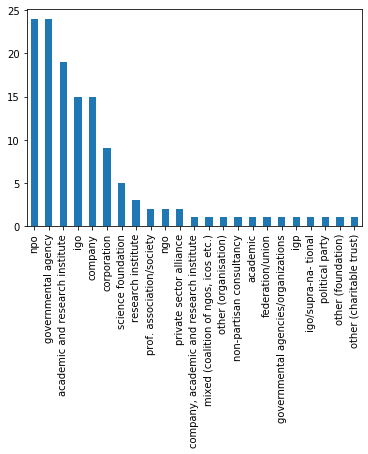

In [198]:
doc_org_category['org_category'].value_counts().plot(kind='bar')

## Question 2: for all author percentage of different affiliation categories

In [199]:
authors = people_db[people_db['author_bool']==1]

In [200]:
authors_with_current_aff = authors[authors['current_affiliation'].notna()]
print(authors_with_current_aff.shape)

#this code gets the list of organizations from the authors table, and we can see later if they all match the names in the organizations table
author_org_category = pd.DataFrame(columns=['author', 'organisation', 'org_category'])
missing=0
found=0
for index, author in authors_with_current_aff.iterrows():
    #print(index)
    org_list = author['current_affiliation']
    orgs = org_list.split(',')
    orgs = [org.strip() for org in orgs]
    for org in orgs:
        #print(org)
        org = org.rstrip()
        if org not in organisations_db['name'].values:
            missing = missing +1
        else:
            found = found +1 
            org_row = organisations_db[organisations_db['name'] == org].iloc[0]
            #print(org_row.iloc[0])
            author_org_category = author_org_category.append({'author':author['name'], 'organisation':org_row['name'], 'org_category':org_row['category']}, ignore_index=True)
            #print(author_org_category.shape)
print('missing org from authors : '+str(missing))
print('found orgs from authors : '+str(found))

(350, 5)
missing org from authors : 93
found orgs from authors : 325


In [201]:
author_org_category = delete_whitespace_from_column(author_org_category, 'org_category')
author_org_category = put_col_to_lowercase(author_org_category, 'org_category')

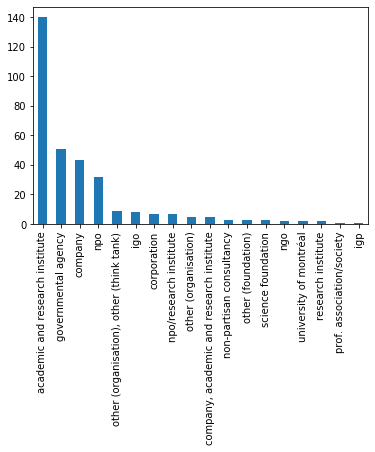

In [202]:
author_org_category['org_category'].value_counts().plot(kind='bar')

In [204]:
#for cat in author_org_category.org_category:
  #  print(cat)

## Question 3: for all documents, percentage of different funders categories

In [267]:
missing_funders.shape

(10, 2)

In [270]:
documents_with_funders = documents[documents['Document funding sources'].notna()]
print(documents_with_funders.shape)

#this code gets the list of organizations from the authors table, and we can see later if they all match the names in the organizations table
doc_funder_category = pd.DataFrame(columns=['doc', 'funder', 'funder_category'])
missing=0
found=0
for index, doc in documents_with_funders.iterrows():
    #print(index)
    f_list = doc['Document funding sources']
    
    funders = f_list.split(',')
    funders = [funder.strip() for funder in funders]
    
    
    for funder in funders:
        #print(org)
        funder = funder.rstrip()
        #print(funder)
        if funder not in funders_db['name'].values:
            missing = missing +1
        else:
            found = found +1 
            funder_row = funders_db[funders_db['name'] == funder].iloc[0]
            #print(org_row.iloc[0])
            doc_funder_category = doc_funder_category.append({'doc':document['Original Title'], 'funder':funder_row['name'], 'funder_category':funder_row['category']}, ignore_index=True)
            #print(doc_funder_category.shape)
print('missing funder from doc : '+str(missing))
print('found funder from doc : '+str(found))

(39, 8)
missing funder from doc : 10
found funder from doc : 171


In [271]:
doc_funder_category.head()

,doc,funder,funder_category
0,Ethics Review of Machine Learning in Children'...,European Commission,IGO
1,Ethics Review of Machine Learning in Children'...,Engineering and Physical Sciences Research Coucil,NGO
2,Ethics Review of Machine Learning in Children'...,Arts and Humanities Research Council,NGO
3,Ethics Review of Machine Learning in Children'...,European Commission,IGO
4,Ethics Review of Machine Learning in Children'...,European Parliament,IGO


In [273]:
doc_funder_category = delete_whitespace_from_column(doc_funder_category, 'funder_category')
doc_funder_category = put_col_to_lowercase(doc_funder_category, 'funder_category')

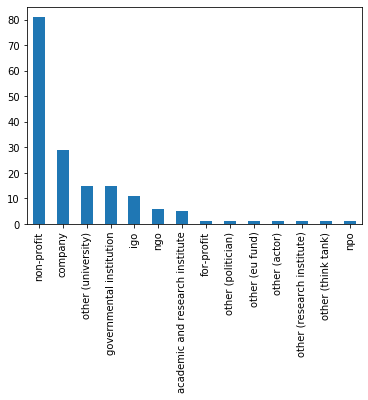

In [274]:
doc_funder_category['funder_category'].value_counts().plot(kind='bar')

## create dataframe of author affiliation per document

In [330]:
"""Create a table where each row is a document. 
Then, the percentage of authors that are affiliated to npo, governemental agency company, and academic are 4 columns of that table.
We only display the documents who have multiple authors"""

print(documents_with_authors.shape)
doc_author_affiliations = pd.DataFrame(columns=['document', 'nb_authors', 'author_names', 'perc_academic', 'perc_gov', 'perc_npo', 'perc_company'])

missing=0
found=0
for index, document in documents_with_authors.iterrows():
    print(document['Original Title'])
    #get the authors percentages
    author_list = document["Authors"]
    authors = author_list.split(',')
    authors = [author.strip() for author in authors]
    
    perc_academic = 0 
    perc_npo=0
    perc_company=0
    perc_gov=0
    print(index)
    if index != 1:
        author_length = len(authors)
        for author in authors:
            #print(author)
        #retrieve the corresponding row in the authors table
            author = author.rstrip()
            if author in author_org_category["author"].values:
                #author_row = people_db[people_db['name'] == author].iloc[0]
                #retrieve corresponding affiliation 
                author_aff = author_org_category[author_org_category['author'] == author]
                academic_count=0
                npo_count=0
                company_count=0
                gov_count=0
                for i,aff_row in author_aff.iterrows():
                    #print(author_aff)
                    aff = aff_row['org_category']
                    if aff == 'academic and research institute':
                        academic_count = academic_count+1
                    elif aff=="npo":
                        npo_count=npo_count+1
                    elif aff == "company":
                        company_count= company_count+1
                    elif aff =='governmental agency':
                        gov_count = gov_count+1
                        
                #if the author has at least one affiliation from a certain category, add a 1 
                if academic_count > 0:
                    perc_academic =  perc_academic+1
                if npo_count > 0 :
                    perc_npo=perc_npo+1
                if company_count >0:
                    perc_company=perc_company+1
                if gov_count>1:
                    perc_gov = perc_gov +1
                #print('perc academic: '+str(perc_academic))
                #print('perc npo: '+str(perc_npo))
                #print('perc company: '+str(perc_company))
            
            else:
                author_length = author_length -1
            
        if author_length>=1:
            perc_academic =  perc_academic/author_length
            perc_npo=perc_npo/author_length
            perc_company=perc_company/author_length
            perc_goc = perc_gov/author_length

            doc_author_affiliations = doc_author_affiliations.append({'document':document['Original Title'], 
                                                 'nb_authors':len(authors), 
                                                 'author_names':author_list,
                                                 'perc_academic':perc_academic, 
                                                 'perc_gov':perc_gov,
                                                 'perc_npo':perc_npo, 
                                                 'perc_company':perc_company}, ignore_index=True)
        else:
            doc_author_affiliations = doc_author_affiliations.append({'document':document['Original Title'], 
                                                 'nb_authors':len(authors), 
                                                 'author_names':author_list,
                                                 'perc_academic':perc_academic, 
                                                 'perc_gov':perc_gov,
                                                 'perc_npo':perc_npo, 
                                                 'perc_company':perc_company}, ignore_index=True)

            #else:
             #   perc_academic = 0
              #  perc_npo=0
               # perc_company=0
        
        #doc_author_affiliations = doc_author_affiliations.append({'document':document['Original Title'], 
         #                                                'nb_authors':len(authors), 
          #                                               'author_names':author_list,
           #                                              'perc_academic':perc_academic, 
            #                                             'perc_npo':perc_npo, 
             #                                            'perc_company':perc_company}, ignore_index=True)

        
        print('perc academic: '+str(perc_academic))
        print('perc npo: '+str(perc_npo))
        print('perc company: '+str(perc_company))
        print('perc gov: '+str(perc_gov))
        
        
                

(59, 8)
AI Now 2019 Report
0
perc academic: 1.0
perc npo: 0.0
perc company: 0.0
perc gov: 0
Ethics Guidelines for Trustoworthy AI
1
Understanding Artificial Intelligence Ethics and safety
2
perc academic: 1.0
perc npo: 0.0
perc company: 0.0
perc gov: 0
Artificial Intelligence: the global landscape of ethics guidelines
3
perc academic: 1.0
perc npo: 0.0
perc company: 0.0
perc gov: 0
Artificial Intelligence Ethics, governance and policy challenges Report of a CEPS Task Force
6
perc academic: 0
perc npo: 0
perc company: 0
perc gov: 0
Relevance of Ethical Guidelines for Artificial Intelligence – A Survey and Evaluation
7
perc academic: 0.6666666666666666
perc npo: 0.3333333333333333
perc company: 0.0
perc gov: 0
Report of COMEST on robotics ethics
8
perc academic: 0
perc npo: 0
perc company: 0
perc gov: 0
AI- Our approach
9
perc academic: 0
perc npo: 0
perc company: 0
perc gov: 0
Human Rights in the Robot Age
10
perc academic: 1.0
perc npo: 0.0
perc company: 0.0
perc gov: 0
AI Now 2017 Rep

In [332]:
perc_academic_mean = doc_author_affiliations['perc_academic'].mean()
perc_npo_mean = doc_author_affiliations['perc_npo'].mean()
perc_company_mean = doc_author_affiliations['perc_company'].mean()
perc_gov_mean = doc_author_affiliations['perc_gov'].mean()

print('perc academic: '+str(perc_academic_mean))
print('perc npo: '+str(perc_npo_mean))
print('perc company: '+str(perc_company_mean))
print('perc gov : '+str(perc_gov_mean))

perc academic: 0.30385323488771765
perc npo: 0.07324787281683834
perc company: 0.11099843642947092
perc gov : 0.017241379310344827


<BarContainer object of 4 artists>

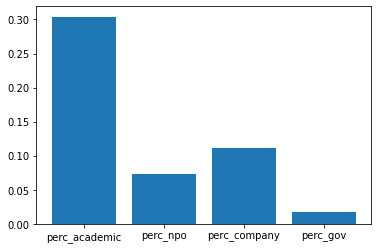

In [333]:
#df.plot(x="X", y=["A", "B", "C"], kind="bar")
plt.bar(x=['perc_academic','perc_npo','perc_company', 'perc_gov'],height=[perc_academic_mean,perc_npo_mean ,perc_company_mean, perc_gov_mean])


In [302]:
doc_author_affiliations.head()

,document,nb_authors,author_names,perc_academic,perc_gov,perc_npo,perc_company
0,AI Now 2019 Report,16,"Kate Crawford, Roel Dobbe, Theodora Dryer, Gen...",1.000000,0,0.000000,0.0
1,Understanding Artificial Intelligence Ethics a...,1,David Leslie,1.000000,0,0.000000,0.0
2,Artificial Intelligence: the global landscape ...,3,"Anna Jobin, Marcello Ienca , Effy Vayena",1.000000,0,0.000000,0.0
3,"Artificial Intelligence Ethics, governance and...",1,Andrea Renda,0.000000,0,0.000000,0.0
4,Relevance of Ethical Guidelines for Artificial...,3,"Lea Rothenberger, Benjamin Fabian, Elmar Arunov",0.666667,0,0.333333,0.0


## Question 4: For all documents whose issuing organization is public, look into the authors affiliation and see what percentage of authors have a link to a private sector.

## see my logic here under, important to read before looking at the numbers etc!

there could be multiples instances of the same document. Indeed, there will be as many documentswith the same title as number of issuing organizations it has. In order not to bias our number, we consider a document to be issued by the public sector if at least one of its issuing organizations is from a public organisation (gov or academic), and none from a private organization

In [313]:
doc_org_category.head()

,document,organisation,org_category
0,AI Now 2019 Report,AI Now Institute,academic and research institute
1,Ethics Guidelines for Trustoworthy AI,High-Level Expert Group on Artificial Intellig...,igo
2,Understanding Artificial Intelligence Ethics a...,The Alan Turing Institute,academic and research institute
3,Artificial Intelligence: the global landscape ...,Health Ethics & Policy Law,academic and research institute
4,Draft AI R&D Guidelines for International Disc...,Institute for Information and Communications P...,governmental agency


In [322]:
#make sure that the column has be set to lower case already! (otherwise this will not work)
doc_from_public = doc_org_category.loc[doc_org_category["org_category"].isin(['academic and research institute','npo', 'governmental agency'])]
print(doc_from_public.shape)
#delete any of these documents if there is also a row in the table where they were linked to an issuing organizartion that is a company
private_titles = list(doc_org_category[doc_org_category['org_category'] == 'company'].document.values)
print(private_titles)
doc_from_public = doc_from_public[~doc_from_public['document'].isin(private_titles)]
print(doc_from_public.shape)

(67, 3)
['The responsible AI framework', 'Responsible AI and robotics. An ethical framework', 'Everyday Ethics for Artificial Intelligence', "SAP's Guiding Principles for Artificial Intelligence", 'AI Principles of Telefónica', 'Artificial Intelligence at Google: Our Principles', 'Introducing Unity’s Guiding Principles for Ethical AI', 'Ethical Principles for Artificial Intelligence and Data Analytics', 'DeepMind Ethics &\nSociety Principles', 'AI Guidelines', "IBM's Principles for Trust and Transparency", 'Artificial Intelligence in financial services', 'Advancing AI ethics beyond compliance: From principles to practice', 'Living in an AI World 2020 Achievement and Challenges of Artificial Intelligence Across Five industries', "Ethics Review of Machine Learning in Children's Social Care"]
(67, 3)


In [324]:
doc_from_public = doc_from_public.drop_duplicates(subset='document', keep='first')
print(doc_from_public.shape)

(56, 3)


In [336]:
perc_ac_list=list()
perc_npo_list=list()
perc_company_list=list()
perc_gov_list=list()

found=0
missing=0 

perc_ac =0
perc_npo=0
perc_company=0
perc_gov = 0

for i, doc in doc_from_public.iterrows():
    #print(doc['document'])

    if doc['document'] in doc_author_affiliations['document'].values:
        found =found+1
        #find that document in the doc_author_affiliation table
        doc_author_row = doc_author_affiliations[doc_author_affiliations['document'] == doc['document']].iloc[0]
        perc_ac =perc_ac+doc_author_row['perc_academic']
        perc_npo= perc_npo + doc_author_row['perc_npo']
        perc_company=  perc_company + doc_author_row['perc_company']
        perc_gov = perc_gov + doc_author_row['perc_gov']
    else:
        #print(doc['document'])
        #this happens because the document didnt have authors
        missing = missing +1
print('found: '+str(found))
print('no authors (non disclosed): '+str(missing))

perc_ac =perc_ac/found
perc_npo=perc_npo/found
perc_company=perc_company/found
perc_gov = perc_gov/found

print('perc acc '+str(perc_ac))
print('perc npo: '+str(perc_npo))
print('perc company: '+str(perc_company))
print('perc gov: '+str(perc_gov))

found: 30
no authors (non disclosed): 26
perc acc 0.4381974506974507
perc npo: 0.1416125541125541
perc company: 0.10690466940466939
perc gov: 0.03333333333333333


<BarContainer object of 3 artists>

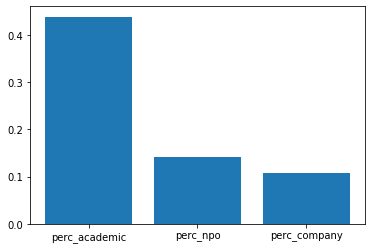

In [337]:
plt.bar(x=['perc_academic','perc_npo','perc_company'],height=[perc_ac,perc_npo ,perc_company])
